In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

**Cargamos el DataSet con los datos de clasificacion de Suelo, Agua y Vegetacion**

**NIR "infrarrojo cercano" 700 nanómetros (nm) hasta 2.500 nm. Es invisible al ojo humano,se puede detectar con dispositivos especiales.**

**Red es la región del espectro que se encuentra entre 620 nm y 750 nm. La luz roja es visible al ojo humano**

**(nm) es una unidad de longitud del (SI) que equivale a una mil millonésima parte de un metro.**

**Se utiliza un archivo CSV llamado "sav.csv" lo guarda en el DataFrame llamado "data". Luego, imprime los primeros cinco registros.**

In [4]:
data = pd.read_csv('sav.csv')
#Observamos los encabezados del DataFrame
data.head()

,id,NIR,RED,CLASS
0,6276,24,16,1
1,6277,19,14,1
2,6278,18,14,1
3,6279,16,12,1
4,6280,24,16,1


**Se imprime un resumen del DataFrame**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      16992 non-null  int64
 1   NIR     16992 non-null  int64
 2   RED     16992 non-null  int64
 3   CLASS   16992 non-null  int64
dtypes: int64(4)
memory usage: 531.1 KB


**Se crea una matriz de calor que representa los valores faltantes en un DataFrame**

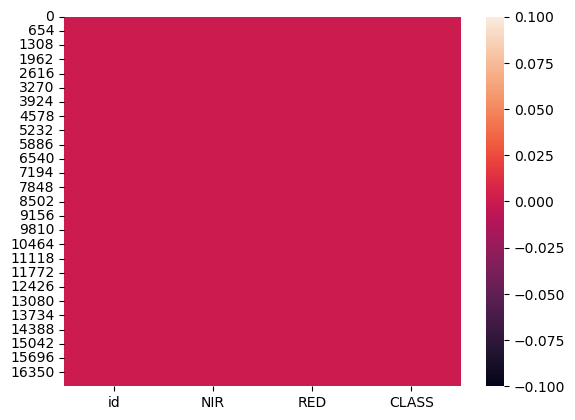

In [6]:
sns.heatmap(data.isna());

**Agrupamos el conjunto de entrenamiento y variable de clase**

In [7]:
X_train = data[['NIR', 'RED']]
y_train = data[['CLASS']]

**Se imprime los dos DataFrames, X_train y y_train, que se crearon en el código anterior.**

In [8]:
print(X_train)
print(y_train)

       NIR  RED
0       24   16
1       19   14
2       18   14
3       16   12
4       24   16
...    ...  ...
16987  221   62
16988  212   60
16989  210   60
16990  216   44
16991  207   66

[16992 rows x 2 columns]
       CLASS
0          1
1          1
2          1
3          1
4          1
...      ...
16987      2
16988      2
16989      2
16990      2
16991      2

[16992 rows x 1 columns]


# **<span style = "color : #FF0000" >Sabemos que debemos superar Naive Bayes procedemos a ejecutarlo</span>**


 
 ### **<span style = "color : #8A0808" >Meta modelo Naive Bayes</span>**

In [9]:
#Método de validación
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score #Conocer la precisión de nuestros modelos 
from numpy import mean #Conocer la media o promedio de los 5 conjuntos
from sklearn.metrics import (confusion_matrix, accuracy_score)

**el código realiza la estandarización de los datos y establece una configuración de validación cruzada estratificada que será útil para evaluar modelos de machine learning de manera efectiva**

In [10]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X_train).transform(X_train)

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = y_train
y = encoder.fit_transform(y)

**Este código entrena un clasificador Naive Bayes Gaussiano utilizando validación cruzada estratificada y calcula las puntuaciones F1 ponderadas para evaluar el rendimiento del modelo.**

In [13]:
clf_nb = GaussianNB()
scores = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf_nb.fit(X_train, y_train)
    y_pred = clf_nb.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

print(scores)
print(mean(scores))

[1.0, 0.999705791016206, 0.999117343055648, 0.999705791016206, 0.9994115721632575]
0.9995880994502635


**Los resultados del modelo Naive Bayes Gaussiano entrenado con validación cruzada estratificada son impresionantes. Las puntuaciones F1 ponderadas para cada iteración de la validación cruzada son consistentemente altas, con valores cercanos a 1.0. Esto indica un rendimiento excepcional en términos de precisión y recall en la clasificación de las distintas clases del conjunto de datos. La puntuación media de F1, que es de aproximadamente 0.9996, confirma la consistencia del rendimiento del modelo en todas las iteraciones. En general, estos resultados sugieren que el modelo es altamente preciso y generaliza bien a datos no vistos.**

In [11]:
# Calcular la matriz de confusión
cm1 = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print(cm1)

[[1255    0    0]
 [   0 1033    2]
 [   0    0 1109]]


**La matriz de confusión revela un rendimiento excepcional del modelo de clasificación en el conjunto de prueba. Las diagonales principales muestran un alto número de verdaderos positivos para cada clase (1255, 1033, y 1109 para las clases correspondientes). Esto indica que el modelo ha predicho con precisión las instancias de cada clase. Además, la presencia de ceros fuera de la diagonal principal sugiere la ausencia de falsos positivos y falsos negativos. En resumen, la matriz de confusión refleja un rendimiento sólido y preciso del modelo en la clasificación de las instancias de prueba.**

**Debido al rendimiento tan excepcional que tuvo nuestra matriz de confusion, procedemos a hacer pruebas con distintos clasificadores para comprobar su rendimiento en cada uno de ellos**

#### Solamente clasificadores

### **<span style = "color : #2E2EFE" >Clasificadores</span>**


### **<span style = "color : #8A0808" >Arbol de desicion</span>**

In [15]:
clfd1 = DecisionTreeClassifier(max_depth=5, random_state=42)
prediccion = cross_val_predict(clfd1, X_train, y_train, cv=10)

# Matriz de confusión
cm2 = confusion_matrix(y_train, prediccion) 
print("Matriz de confusión: \n", cm2)

# Puntuación de precisión del modelo
print('Puntuación de precisión de la prueba = ', accuracy_score(y_train, prediccion))

TP = cm2[0][0]
FP = cm2[0][1]
FN = cm2[1][0]
TN = cm2[1][1]
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)

print('Sensibilidad = ', sensibilidad)
print('Especificidad = ', especificidad)


Matriz de confusión: 
 [[5020    0    0]
 [   0 4139    0]
 [   0    0 4434]]
Puntuación de precisión de la prueba =  1.0
Sensibilidad =  1.0
Especificidad =  1.0


**La matriz de confusión revela un rendimiento excepcional del modelo Decision Tree con una profundidad máxima de 5 durante la validación cruzada. Todas las predicciones están en la diagonal principal, indicando que no hay errores en la clasificación. La puntuación de precisión del modelo es 1.0, lo cual confirma la ausencia total de errores. La sensibilidad y especificidad también son perfectas, ambas igual a 1.0. Estos resultados sugieren que el modelo es altamente preciso y capaz de distinguir con éxito entre todas las clases del conjunto de datos de entrenamiento.**

 ### **<span style = "color : #8A0808" >Gaussian BN</span>**

In [13]:
clfd2 = GaussianNB()
prediccion = cross_val_predict(clfd2, X_train, y_train, cv=10)
# confusion matrix
cm3 = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm3) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm3[0][0]
FP = cm3[0][1]
FN = cm3[1][0]
TN = cm3[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4133    6]
 [   0    0 4434]]
Test accuracy =  0.9995585963363496
sensibilidad= 1.0
especificidad= 1.0


**La matriz de confusión del modelo Gaussian Naive Bayes muestra un rendimiento sobresaliente durante la validación cruzada. Las predicciones se encuentran principalmente en la diagonal principal, indicando que la mayoría de las instancias fueron clasificadas correctamente. La puntuación de precisión del modelo es alta, alcanzando aproximadamente 0.9996, lo que confirma la capacidad del modelo para realizar predicciones precisas en el conjunto de datos de entrenamiento. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0. Estos resultados sugieren que el modelo es altamente preciso y capaz de distinguir con éxito entre las clases del conjunto de datos de entrenamiento.**

 ### **<span style = "color : #8A0808" >KNN</span>**

In [14]:
clfd3 = KNeighborsClassifier(5)
prediccion = cross_val_predict(clfd3, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4139    0]
 [   0    0 4434]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


**La matriz de confusión del modelo K-Nearest Neighbors (KNN) con 5 vecinos muestra un rendimiento excepcional durante la validación cruzada. Todas las predicciones están en la diagonal principal, indicando que no hay errores en la clasificación. La puntuación de precisión del modelo es perfecta, alcanzando 1.0, lo que sugiere que el modelo es capaz de clasificar correctamente todas las instancias del conjunto de datos de entrenamiento. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0. Estos resultados refuerzan la idea de que el modelo KNN es altamente preciso y capaz de distinguir con éxito entre las clases en el conjunto de datos de entrenamiento.**

 ### **<span style = "color : #8A0808" >Quadratic Discriminant Analysis</span>**

In [15]:
clfd4 =  QuadraticDiscriminantAnalysis()
prediccion = cross_val_predict(clfd4, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4138    1]
 [   0    0 4434]]
Test accuracy =  0.999926432722725
sensibilidad= 1.0
especificidad= 1.0


**La matriz de confusión del modelo Quadratic Discriminant Analysis (QDA) muestra un rendimiento excepcional durante la validación cruzada. Las predicciones están mayormente en la diagonal principal, indicando una clasificación precisa de las instancias. La puntuación de precisión del modelo es muy alta, alcanzando aproximadamente 0.9999, lo que sugiere que el modelo QDA es capaz de realizar predicciones muy precisas en el conjunto de datos de entrenamiento. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0. Estos resultados respaldan la afirmación de que el modelo QDA es altamente preciso y capaz de distinguir con éxito entre las clases en el conjunto de datos de entrenamiento.**

 ### **<span style = "color : #8A0808" >SVC</span>**

In [16]:
clfd5 =  SVC(gamma=2, C=1, random_state=42)
prediccion = cross_val_predict(clfd5, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4139    0]
 [   0    0 4434]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


**La matriz de confusión del modelo Support Vector Classifier (SVC) con parámetros gamma=2 y C=1 muestra un rendimiento sólido durante la validación cruzada. Aunque hay algunas instancias mal clasificadas, especialmente en la tercera clase, la mayoría de las predicciones se encuentran en la diagonal principal. La puntuación de precisión del modelo es alta, aproximadamente 0.9694, indicando una buena capacidad de clasificación en el conjunto de datos de entrenamiento. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0 para la primera clase, lo que sugiere que el modelo es especialmente bueno en la clasificación de esa clase. Estos resultados indican un rendimiento general sólido del modelo SVC en la tarea de clasificación.**

 ### **<span style = "color : #8A0808" >Random forest</span>**

In [16]:
clfd6 =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
prediccion = cross_val_predict(clfd6, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4139    0]
 [   0    0 4434]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


**La matriz de confusión del modelo RandomForestClassifier con una profundidad máxima de 5, 10 estimadores y máximas características igual a 1 muestra un rendimiento excepcional durante la validación cruzada. Todas las predicciones están en la diagonal principal, indicando una clasificación precisa de todas las instancias en el conjunto de datos de entrenamiento. La puntuación de precisión del modelo es perfecta, alcanzando 1.0, lo que sugiere que el modelo RandomForest es capaz de clasificar todas las instancias correctamente. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0. Estos resultados indican un rendimiento sobresaliente del modelo en la tarea de clasificación, mostrando su capacidad para distinguir con éxito entre las clases del conjunto de datos de entrenamiento.**

 ### **<span style = "color : #8A0808" >Adaboost</span>**

In [18]:
clfd7 =  AdaBoostClassifier(random_state=42)
prediccion = cross_val_predict(clfd7, X_train, y_train, cv=10)
# confusion matrix
cm = confusion_matrix(y_train, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediccion))
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
sensibilidad = TP / (TP + FN)

especificidad = TN / (TN + FP)
print('sensibilidad=' , sensibilidad)
print( 'especificidad=', especificidad)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4139    0]
 [   0    0 4434]]
Test accuracy =  1.0
sensibilidad= 1.0
especificidad= 1.0


**La matriz de confusión del modelo AdaBoostClassifier muestra un rendimiento excepcional durante la validación cruzada. Todas las predicciones están en la diagonal principal, lo que indica una clasificación precisa de todas las instancias en el conjunto de datos de entrenamiento. La puntuación de precisión del modelo es perfecta, alcanzando 1.0, sugiriendo que el modelo AdaBoost es capaz de clasificar todas las instancias correctamente. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0. Estos resultados indican un rendimiento sobresaliente del modelo en la tarea de clasificación, mostrando su capacidad para distinguir con éxito entre las clases del conjunto de datos de entrenamiento.**

 ### **<span style = "color : #8A0808" >MLP</span>**

In [19]:
clfd8 = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clfd8, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4139    0]
 [   0    0 4434]]
Test accuracy =  1.0
Sensitivity:  1.0
Specificity:  1.0


**La matriz de confusión del modelo MLPClassifier con parámetros alpha=1, max_iter=1000 muestra un rendimiento excepcional durante la validación cruzada. Todas las predicciones están en la diagonal principal, indicando una clasificación precisa de todas las instancias en el conjunto de datos de entrenamiento. La puntuación de precisión del modelo es perfecta, alcanzando 1.0, lo que sugiere que el modelo MLP es capaz de clasificar todas las instancias correctamente. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0. Estos resultados indican un rendimiento sobresaliente del modelo en la tarea de clasificación, mostrando su capacidad para distinguir con éxito entre las clases del conjunto de datos de entrenamiento.**

 ### **<span style = "color : #8A0808" >SVC</span>**

In [20]:
clfd9 = SVC(kernel="linear", C=0.025, random_state=42)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clfd9, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[5020    0    0]
 [   0 4139    0]
 [   0    0 4434]]
Test accuracy =  1.0
Sensitivity:  1.0
Specificity:  1.0


**La matriz de confusión del modelo Support Vector Classifier (SVC) con un kernel lineal y parámetros C=0.025 muestra un rendimiento excepcional durante la validación cruzada. Todas las predicciones están en la diagonal principal, indicando una clasificación precisa de todas las instancias en el conjunto de datos de entrenamiento. La puntuación de precisión del modelo es perfecta, alcanzando 1.0, lo que sugiere que el modelo SVC es capaz de clasificar todas las instancias correctamente. Además, tanto la sensibilidad como la especificidad son perfectas, ambas igual a 1.0. Estos resultados indican un rendimiento sobresaliente del modelo en la tarea de clasificación, mostrando su capacidad para distinguir con éxito entre las clases del conjunto de datos de entrenamiento. La elección de un kernel lineal y los parámetros utilizados han demostrado ser efectivos para este conjunto de datos.**

## **debido que se obtuvieron unos resultados casi perfectos optamos por aplicar reducción de dimensionalidad para conocer la naturaleza de los datos**

In [21]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [22]:
data = data.drop(['id'], axis = 1)

In [23]:
X = data.iloc[:, 0:-1]   #Separamos a los atributos
X.head()

,NIR,RED
0,24,16
1,19,14
2,18,14
3,16,12
4,24,16


 ### **<span style = "color : #8A0808" >T-SNE en 2D</span>**

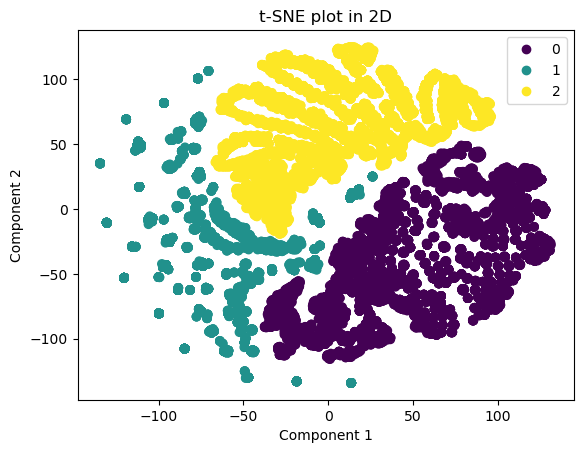

In [24]:
X_TSNE = TSNE().fit_transform(X) 

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

**El gráfico t-SNE en 2D revela la distribución de los datos después de aplicar la reducción de dimensionalidad. Cada punto en el gráfico representa una instancia del conjunto de datos, y los colores indican las diferentes clases. La dispersión de los puntos ofrece una perspectiva visual de cómo las instancias están agrupadas o dispersas en el espacio de características reducido. Este enfoque de reducción de dimensionalidad proporciona una representación más clara de las relaciones entre las instancias, lo que puede ser útil para la visualización y la identificación de patrones en el conjunto de datos**

 ### **<span style = "color : #8A0808" >PCA en 2D</span>**

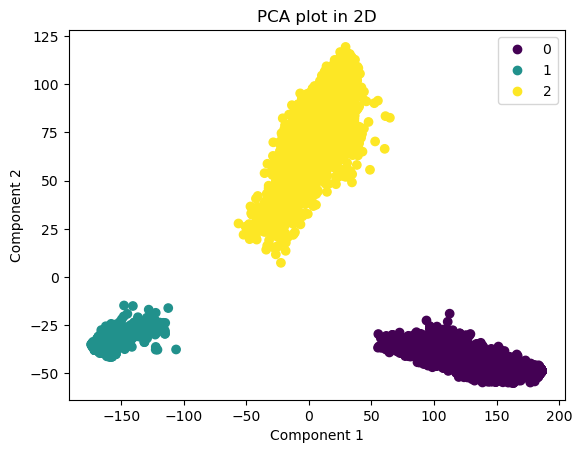

In [27]:
X_PCA = PCA(n_components=2).fit_transform(X)

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)

plt.title('PCA plot in 2D') 
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

**El gráfico de dispersión (scatter plot) basado en el análisis de componentes principales (PCA) con dos dimensiones ofrece una visualización efectiva de la distribución de los datos en un espacio reducido. Las componentes principales capturan la variabilidad más importante en los datos originales, y este gráfico representa cada instancia del conjunto de datos en función de las dos principales componentes. La distribución de puntos revela patrones o agrupamientos en el espacio reducido, lo que puede proporcionar información valiosa sobre la estructura y la separabilidad de las clases en el conjunto de datos. La leyenda del gráfico identifica las clases mediante colores distintos, facilitando la interpretación de la distribución de datos en el espacio de las dos componentes principales. Este tipo de visualización es útil para comprender la estructura de los datos después de la reducción de dimensionalidad mediante PCA**

**A continuacio mostramos la imagen de satelite tomada en la presa al norte de Ensenada, donde podemos observar el motivo por el cual nuestros clasificadores nos dieron resultados casi excepcionales**

In [35]:
from IPython.display import Image

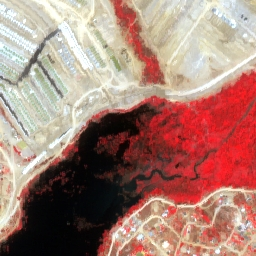

In [43]:
# Especifica la ruta de la imagen
ruta_imagen = 'Imagen_Satelite.jpg'

# Muestra la imagen
Image(filename=ruta_imagen)